##Simple linear Regression
*2173024_Muhammad Ikraam Mahendra*
Simple Linear Regression memodelkan hubungan antara sebuah response variable dengan sebuah explanatory variable sebagai suatu garis lurus (linear)

Referensi: https://en.wikipedia.org/wiki/Simple_linear_regression


In [1]:
import pandas as pd
pizza = {'diameter': [6,8,10,14,18],
        'harga':[7,9,13,17.5,18]}
pizza_df = pd.DataFrame(pizza)
pizza_df

,diameter,harga
0,6,7.0
1,8,9.0
2,10,13.0
3,14,17.5
4,18,18.0


#*Visualisasi Data*

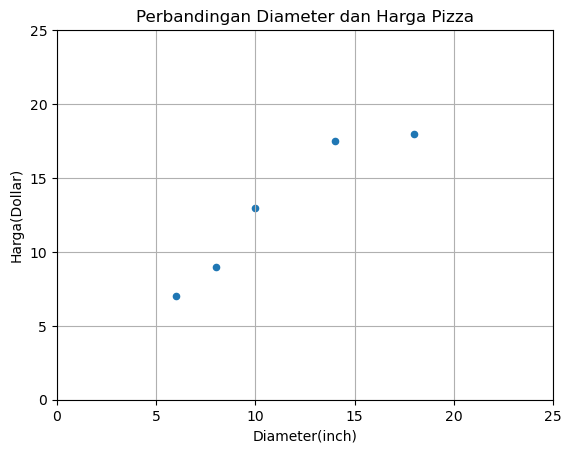

In [2]:
import matplotlib.pyplot as plt

pizza_df.plot(kind='scatter', x='diameter',y='harga')

plt.title('Perbandingan Diameter dan Harga Pizza')
plt.xlabel('Diameter(inch)')
plt.ylabel('Harga(Dollar)')
plt.xlim(0, 25)
plt.ylim(0, 25)
plt.grid(True)
plt.show()

*Penyesuaian Dataset*

In [3]:
import numpy as np

x = np.array(pizza_df['diameter'])
y = np.array(pizza_df['harga'])

print(f'x : {x}')
print(f'y : {y}')

x : [ 6  8 10 14 18]
y : [ 7.   9.  13.  17.5 18. ]


In [4]:
x = x.reshape(-1,1)
x.shape

(5, 1)

In [5]:
x

array([[ 6],
       [ 8],
       [10],
       [14],
       [18]], dtype=int64)

In [ ]:
*Training Simple Linear Regression Model*

In [6]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x,y)

LinearRegression()

*Visualisasi Simple Linear Regression Model*

In [7]:
x_vis = np.array([0, 25]).reshape(-1,1)
y_vis = model.predict(x_vis)

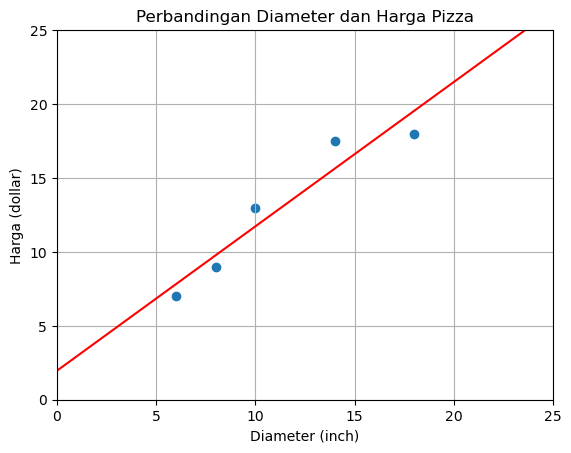

In [8]:
plt.scatter(x,y)
plt.plot(x_vis, y_vis, '-r')

plt.title('Perbandingan Diameter dan Harga Pizza')
plt.xlabel('Diameter (inch)')
plt.ylabel('Harga (dollar)')
plt.xlim(0, 25)
plt.ylim(0, 25)
plt.grid(True)
plt.show()

In [ ]:
*Formula Linear Regression ==> y = α + βx*
y: response variable
x: explanatory variable
α: intercept
β: slope

In [9]:
print(f'intercept : {model.intercept_}')
print(f'slope : {model.coef_}')

intercept : 1.965517241379315
slope : [0.9762931]


*Mencari Nilai Scope*

In [10]:
print(f'x:\n{x}\n')
print(f'x flatten: {x.flatten()}\n')
print(f'y: {y}')

x:
[[ 6]
 [ 8]
 [10]
 [14]
 [18]]

x flatten: [ 6  8 10 14 18]

y: [ 7.   9.  13.  17.5 18. ]


*Variance*

In [11]:
variance_x = np.var(x.flatten(), ddof=1)
print(f'variance: {variance_x}')

variance: 23.2


*Covariance*

In [12]:
np.cov(x.flatten(), y)

array([[23.2 , 22.65],
       [22.65, 24.3 ]])

In [13]:
covariance_xy = np.cov(x.transpose(), y)[0][1]
print(f'covariance: {covariance_xy}')

covariance: 22.650000000000002


*Slope*

In [14]:
slope = covariance_xy / variance_x
print(f'slope : {slope}')

slope : 0.976293103448276


*Mencari Nilai Intercept*

In [15]:
intercept = np.mean(y) - slope * np.mean(x)
print(f'intercept: {intercept}')


intercept: 1.9655172413793096


*Prediksi Harga Pizza*

In [16]:
diameter_pizza = np.array([12,20,23]).reshape(-1,1)
diameter_pizza

array([[12],
       [20],
       [23]])

In [18]:
prediksi_harga = model.predict(diameter_pizza)
prediksi_harga
for dmtr, hrg in zip(diameter_pizza, prediksi_harga):
    print(f'diameter: {dmtr} prediksi harga: {hrg}')

diameter: [12] prediksi harga: 13.681034482758621
diameter: [20] prediksi harga: 21.491379310344826
diameter: [23] prediksi harga: 24.42025862068965


*Evaluasi Simple Linear Regression Model*

In [19]:
x_train = np.array([6,8,10,14,18]).reshape(-1,1)
y_train = np.array([7,9,13,17.5,18])

x_test = np.array([8,9,11,16,12]).reshape(-1,1)
y_test = np.array([11,8.5,15,18,11])

In [20]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [21]:
from sklearn.metrics import r2_score

y_pred = model.predict(x_test)
r_squared = r2_score(y_test, y_pred)

print(f'R-Squared: {r_squared}')

R-Squared: 0.6620052929422553


*Mencari Nilai R-Squared*

In [22]:
ss_res = sum([(y_i - model.predict(x_i.reshape(-1,1))[0])**2
              for x_i, y_i in zip(x_test, y_test)])
print(f'ss_res: {ss_res}')

ss_res: 19.1980993608799


In [23]:
mean_y = np.mean(y_test)
ss_tot = sum([(y_i - mean_y)**2 for y_i in y_test])

print(f'ss_tot: {ss_tot}')

ss_tot: 56.8


In [24]:
r_squared = 1-(ss_res/ss_tot)
print(f'r-squared: {r_squared}')

r-squared: 0.6620052929422553
